In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [11]:
load_dotenv()
llm = ChatGoogleGenerativeAI(model = "gemini-2.5-flash")


In [3]:
class BlogState(TypedDict):
    topic : str
    outline : str
    content : str
    

In [ ]:
def get_outline(state : BlogState) -> BlogState:
    topic = state['topic']
    
    outline_prompt = f"Give a brief outline on the given topic :- {topic}"
    outline = llm.invoke(outline_prompt).content
    state['outline'] = outline
    
    return state

In [13]:
def get_content(state : BlogState) -> BlogState:
    topic = state['topic']
    outline = state['outline']
    
    blog_prompt = f"Write a blog on the topic :- {topic} using the given following outline :- {outline}."
    content = llm.invoke(blog_prompt).content
    
    state['content'] = content
    
    return state


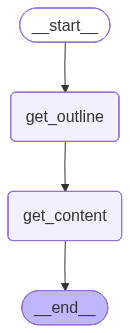

In [9]:
# Create Graph
graph = StateGraph(BlogState)

# Add Node
graph.add_node('get_outline', get_outline)
graph.add_node('get_content', get_content)

# Add Edges
graph.add_edge(START, 'get_outline')
graph.add_edge('get_outline', 'get_content')
graph.add_edge('get_content', END)

# Compile the Graph
workflow = graph.compile()
workflow


In [14]:
initial_state = {"topic" : "GenAi in today's world"}

final_state = workflow.invoke(initial_state)

print(final_state)


{'topic': "GenAi in today's world", 'outline': 'Here\'s a brief outline on GenAI in today\'s world:\n\n**GenAI in Today\'s World**\n\n**I. Introduction to Generative AI (GenAI)**\n    *   **Definition:** AI models capable of creating new, original content (text, images, audio, video, code) rather than just analyzing existing data.\n    *   **Core Technologies:** Built upon large language models (LLMs), diffusion models, and other neural network architectures.\n    *   **Key Shift:** From analytical/predictive AI to creative/generative AI.\n\n**II. Key Characteristics & Capabilities**\n    *   **Content Generation:** Producing realistic and coherent text, images, music, video, and 3D models.\n    *   **Versatility:** Adaptable across various domains and tasks.\n    *   **Speed & Scale:** Rapid creation of large volumes of content.\n    *   **Personalization:** Tailoring content to individual preferences.\n\n**III. Current Applications & Impact**\n    *   **A. Creative Industries:**\n   